In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

model_cv = r'Date,Model,Input Resolution,#Params,Inference GFLOPs,Training PFLOPs\
06/01/2012,AlexNet,227 x 227,61M,1.4,460\
09/04/2014,VGG-19,224 x 224,138M,39,11000\
12/02/2015,InceptionV3,299 x 299,24M,5.7,100000\
12/10/2015,ResNet152,224 x 224,55M,23,11000\
02/26/2016,InceptionV4,299 x 299,82M,24.6,\
10/07/2016,Xception,299 x 299,23M,17,450000\
11/16/2016,ResNeXt101,224 x 224,83M,31,12000\
12/03/2016,DenseNet201,224 x 224,20M,8.9,2800\
12/10/2015,ResNet50,,23M,,'

df_cv = pd.DataFrame([row.replace('\\', '').split(',') for row in model_cv.split('\n')])
n = df_cv.iloc[0]
df_cv = df_cv[1:]
df_cv.columns = n
print(df_cv)

model_nlp = r'Date,Model,Token Size,#Params,#Features,Inference GFLOPs,Training PFLOPs\
09/10/2014,Seq2Seq,,,,,11000\
12/06/2017,Transformer,512,65M,77M,54,23000\
02/15/2018,ELMo,,94M,,,3300\
10/11/2018,BERT Large,512,330M,230M,340250000\
06/11/2018,GPT-1,512,110M,85M,9657000\
02/14/2019,GPT-2,1024,1500M,2000M,3400,\
07/26/2019,RoBERTa Large,512,1500M,2000M,3400,4300000\
08/17/2019,Megatron,1024,8300M,4700M,18000,8100000\
09/26/2019,ALBERT xxl,512,235M,450M,2500,31000000\
02/13/2020,Microsoft T-NLG,1024,17000M,5700M,36000,28000000\
03/23/2020,ELECTRA Large,128,330M,38M,79,3100000\
05/28/2020,GPT-3,2048,175000M,63000M,740000,310000000\
06/30/2020,GShard,,600000M,,,\
06/20/2020,Baidu RecSys-C,N/A,2000000M,N/A,~O(0.1),N/A\
06/20/2020,Baidu RecSys-E,N/A,10000000M,N/A,~O(0.1),N/A\
01/11/2021,Switch Transformer,N/A,1600000M,N/A,N/A,N/A\
01/28/2022,Megatron-Turing,N/A,530000M,N/A,N/A,N/A'

df_nlp = pd.DataFrame([row.replace('\\', '').split(',') for row in model_nlp.split('\n')])
n = df_nlp.iloc[0]
df_nlp = df_nlp[1:]
df_nlp.columns = n
print(df_nlp)

0        Date        Model Input Resolution #Params Inference GFLOPs   
1  06/01/2012      AlexNet        227 x 227     61M              1.4  \
2  09/04/2014       VGG-19        224 x 224    138M               39   
3  12/02/2015  InceptionV3        299 x 299     24M              5.7   
4  12/10/2015    ResNet152        224 x 224     55M               23   
5  02/26/2016  InceptionV4        299 x 299     82M             24.6   
6  10/07/2016     Xception        299 x 299     23M               17   
7  11/16/2016   ResNeXt101        224 x 224     83M               31   
8  12/03/2016  DenseNet201        224 x 224     20M              8.9   
9  12/10/2015     ResNet50                      23M                    

0 Training PFLOPs  
1             460  
2           11000  
3          100000  
4           11000  
5                  
6          450000  
7           12000  
8            2800  
9                  
0         Date               Model Token Size    #Params #Features   
1   09/10

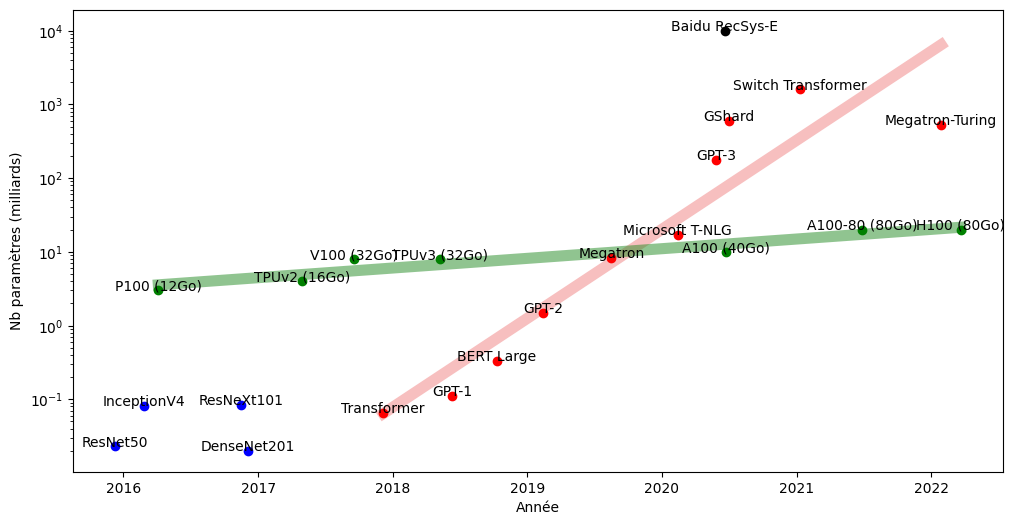

In [7]:
def plot_name(name, df, color):
    r = df.loc[df["Model"] == name]
    x, y = pd.to_datetime(r["Date"]).iloc[0], float(r["#Params"].iloc[0].strip('M'))/1000
    plt.scatter(x, y, color=color)
    plt.annotate(name, (x, y), ha='center')
    return x, y
    
models_cv = ['InceptionV4', 'ResNet50', 'ResNeXt101', 'DenseNet201']
models_nlp = ['Transformer', 'GPT-1', 'BERT Large', 'GPT-2', 'Megatron', 'Microsoft T-NLG', 'GPT-3', 'GShard', 'Switch Transformer', 'Megatron-Turing']
hw = [('P100 (12Go)',.25*12,pd.to_datetime('04/05/2016')),
      ('TPUv2 (16Go)',.25*16,pd.to_datetime('05/01/2017')),
      ('V100 (32Go)',.25*32,pd.to_datetime('09/19/2017')),
      ('TPUv3 (32Go)',.25*32,pd.to_datetime('05/08/2018')),
      ('A100 (40Go)',.25*40,pd.to_datetime('06/22/2020')),
      ('A100-80 (80Go)',.25*80,pd.to_datetime('06/28/2021')),
      ('H100 (80Go)',.25*80,pd.to_datetime('03/22/2022'))]

fig = plt.figure(figsize=(12,6))
for m in models_cv:
    plot_name(m, df_cv, color='blue')
xr, xs, ys = [], [], []
for m in models_nlp:
    x, y = plot_name(m, df_nlp, color='red')
    xr.append(x)
    xs.append(x.toordinal())
    ys.append(y)
b, a = np.polyfit(xs, np.log(ys), 1)
plt.plot(xr, np.exp(a + b * np.array(xs)), color='lightcoral', linewidth=8, zorder=-1, alpha=0.5)

plot_name('Baidu RecSys-E', df_nlp, color='black')

xr, xs, ys = [], [], []
for m in hw:
    plt.scatter(m[2], m[1], color='green')
    plt.annotate(m[0], (m[2], m[1]), ha='center')
    xr.append(m[2])
    xs.append(m[2].toordinal())
    ys.append(m[1])
b, a = np.polyfit(xs, np.log(ys), 1)
plt.plot(xr, np.exp(a + b * np.array(xs)), color='forestgreen', linewidth=8, zorder=-1, alpha=0.5)

plt.yscale('log')
plt.xlabel('Année')
plt.ylabel('Nb paramètres (milliards)')

# 410x/2y red transformers
# 2x/2y ai hw memory

plt.savefig('fig_memory_hw.pdf')
plt.show()
plt.close()
